# Magnetic Trap

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def decay(t, N, tau):
    return N*(np.exp(-t/tau))

In [3]:
holdtime = [1,2,5,10,15,20,25,30,35,40,50,60,70]
fluor = [30,22,25,18,18,12,10,8,7,7,5,2,1]

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style_arial import set_plotting_style_arial
set_plotting_style_arial()

Initialising arial plotting style...
Success! Arial plotting style initialised.


In [5]:
tau = 25.44121183963628

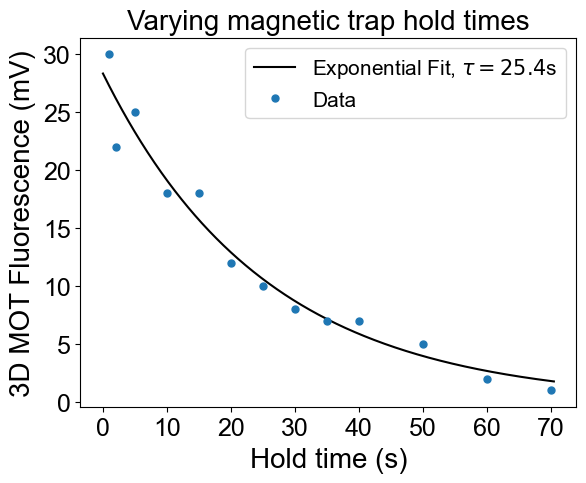

In [6]:
t = np.linspace(0,70.5,1000)
plt.plot(t,decay(t,28.349860484269342,25.44121183963628),'k', label=r'Exponential Fit, $\tau = %.1f$s' %tau)
plt.plot(holdtime,fluor,'.',markersize=10,label = 'Data')
plt.ylabel('3D MOT Fluorescence (mV)')
plt.xlabel('Hold time (s)')
plt.xticks([0,10,20,30,40,50,60,70])
plt.yticks([0,5,10,15,20,25,30])
plt.title('Varying magnetic trap hold times')
plt.legend()
# plt.savefig('MagneticTrapLifetimeFit')

# plt.savefig('3DMOT_MagTrapLifetime.png', dpi=300, bbox_inches='tight')
# plt.savefig('3DMOT_MagTrapLifetime.pdf', dpi=300, bbox_inches='tight')

# Nice latex font

In [25]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [26]:
def number_of_atoms(photodiode_voltage_in_mV):
    P_v = photodiode_voltage_in_mV * 1e-3 # V #Photodiode signal
    P_r = 680*10**(3) # ohm
    Respons = 0.15
    c = 299792458 #m/s
    h = 6.62607015*10**(-34)# Joule*second
    wavelength = 460.862022*10**(-9)
    f = c/wavelength# m/s
    gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
    I_Isat = 0.9
    detune = -60e6 #Hz detuning of the 3D MOT beam


    P_I = P_v/P_r
    P_P = P_I/Respons
    E = h*f 
    r_p=P_P/E
    R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
    N_pd = r_p/R 

    r_sqre = (12.7*10**(-3)/2)**2
    d = 0.15

    A = np.pi*r_sqre
    Omega = A/d**2


    N_r = N_pd*4*np.pi/Omega

    return N_r/1e7

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_28223/3329220418.py:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(holdtime, y_atoms, yerr=y_err,


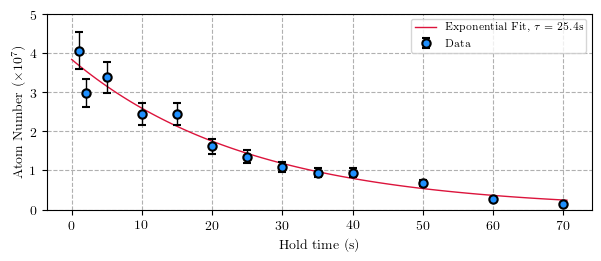

In [32]:
t = np.linspace(0,70.5,100)
plt.plot(t,number_of_atoms(decay(t,28.349860484269342,25.44121183963628)),'-',color='crimson',label=r'Exponential Fit, $\tau = %.1f$s' %tau)
# plt.plot(holdtime,number_of_atoms(np.array(fluor)),'o',label = 'Data')
y_atoms = np.array([number_of_atoms(i) for i in fluor])
y_err = y_atoms * 0.1175
plt.errorbar(holdtime, y_atoms, yerr=y_err, 
             ecolor='black', 
             capsize=3, 
             color='black',
             marker='o', 
             fmt='o',
             label='Data')
plt.ylabel(r"Atom Number ($\times$10$^7$)")
plt.xlabel('Hold time (s)')
plt.xticks([0,10,20,30,40,50,60,70])
plt.yticks([0,1,2,3,4,5])
plt.ylim(0,5)
# plt.title('Varying magnetic trap hold times')
plt.legend()
# plt.savefig('MagneticTrapLifetimeFit')

# plt.savefig('3DMOT_MagTrapLifetime.png', dpi=300, bbox_inches='tight')
plt.savefig('250510 3DBlueMOTMagneticTrapLifetime.pdf', dpi=300)

In [ ]:
fluor

[30, 22, 25, 18, 18, 12, 10, 8, 7, 7, 5, 2, 1]